petgraph review/tutorial
---------------
- Author: [Timothy Hobbs](https://timothy.hobbs.cz)
- License: [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/)
- Written: 10.2019

[project homepage](https://github.com/petgraph/petgraph) [ipynb](./petgraph_review.ipynb)

petgraph is a rust library which allows you to work with graph data structures in rust.

In [2]:
:dep petgraph = "0.4.13"

In [3]:
:dep petgraph-evcxr = "*"

In [4]:
extern crate petgraph;
use petgraph::graph::Graph;
use petgraph::dot::Dot;

In [5]:
use petgraph_evcxr::draw_graph;

I guess I'll start by specifying what kind of graphs we're talking about. We're talking about the datastructure type of graph, not the 'chart' type of graph. For the chart type of graph try the [plotters](https://github.com/38/plotters#trying-with-jupyter-evcxr-kernel-interactively) library.

In [6]:
:dep plotters = { git = "https://github.com/38/plotters", default_features = false, features = ["evcxr"] }

In [7]:
extern crate plotters;
use plotters::prelude::*;

let figure = evcxr_figure((640, 480), |root| {
    root.fill(&WHITE);
    let mut chart = ChartBuilder::on(&root)
        .caption("Not this type of graph", ("Arial", 50).into_font())
        .margin(5)
        .x_label_area_size(30)
        .y_label_area_size(30)
        .build_ranged(-1f32..1f32, -0.1f32..1f32)?;

    chart.configure_mesh().draw()?;

    chart.draw_series(LineSeries::new(
        (-50..=50).map(|x| x as f32 / 50.0).map(|x| (x, x * x)),
        &RED,
    )).unwrap()
        .label("y = x^2")
        .legend(|(x,y)| Path::new(vec![(x,y), (x + 20,y)], &RED));

    chart.configure_series_labels()
        .background_style(&WHITE.mix(0.8))
        .border_style(&BLACK)
        .draw()?;
    Ok(())
});
figure

Not this type of graph
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
0.0
 
 
 
0.2
 
 
 
0.4
 
 
 
0.6
 
 
 
0.8
 
 
 
1.0
 
 
 
 
-0.8
 
 
 
-0.6
 
 
 
-0.4
 
 
 
-0.2
 
 
 
0.0
 
 
 
0.2
 
 
 
0.4
 
 
 
0.6
 
 
 
0.8
 
 
<polyline fill="none" opacity="1" points="35,58 41,71 47,85 53,98 59,112 65,124 71,137 77,149 83,161 89,173 95,184 101,195 107,206 113,217 119,227 125,237 131,247 137,256 143,265 149,274 155,283 161,291 167,299 173,307 179,314 185,321 191,328 197,335 203,341 209,347 215,353 221,359 227,364 233,369 239,373 245,378 251,382 257,386 263,389 269,392 275,395 281,398 287,400 293,402 299,404 305,406 311,407 317,408 323,409 329,409 335,409 341,409 347,409 353,408 359,407 365,406 371,404 377,402 383,400 389,398 395,395 401,392 407,389 413,386 419,382 425,378 431,373 437,369 443,364 449,359 455,353 461,347 467,341 473,335 479,328 485,321 491,314 497,307 503,299 509,291 515,283 521,274 527,265 533,256 539,247 545,237 551,227 557,217 563,206 569,195 575,184 581,173 587,161 593,149 599,137 605,124 611,112 617,98 623,85 629,71 635,58 " stroke="#FF0000" stroke-width="1"/>
 
 
 
y = x^2

This is an example of a graph. You can create a graph in petgraph by initializing a `Graph` struct and adding some nodes and edges to it.

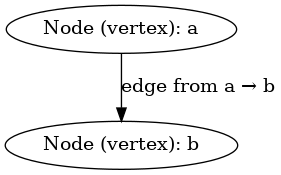

In [8]:
let mut g : Graph<&str, &str> = Graph::new();
let a = g.add_node("Node (vertex): a");
let b = g.add_node("Node (vertex): b");
g.add_edge(a, b, "edge from a → b");
draw_graph(&g);

Graphs are universal datastructures. Every data structure can be represented as a graph. Here are some examples of data structures that can be represented as graphs.

- lists
- tables
- trees
- ring buffers
- dictionaries


Lists
-----

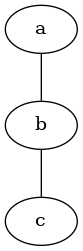

In [9]:
let mut list : Graph<&str, &str, petgraph::Undirected> = Graph::new_undirected();
let item1 = list.add_node("a");
let item2 = list.add_node("b");
let item3 = list.add_node("c");
list.add_edge(item1, item2, "");
list.add_edge(item2, item3, "");
draw_graph(&list);

Tables
------

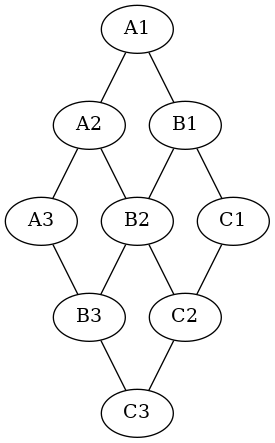

In [10]:
let mut table : Graph<&str, &str, petgraph::Undirected> = Graph::new_undirected();
let cellA1 = table.add_node("A1");
let cellA2 = table.add_node("A2");
let cellA3 = table.add_node("A3");

let cellB1 = table.add_node("B1");
let cellB2 = table.add_node("B2");
let cellB3 = table.add_node("B3");

let cellC1 = table.add_node("C1");
let cellC2 = table.add_node("C2");
let cellC3 = table.add_node("C3");

// Columns
table.add_edge(cellA1, cellA2, "");
table.add_edge(cellA2, cellA3, "");

table.add_edge(cellB1, cellB2, "");
table.add_edge(cellB2, cellB3, "");

table.add_edge(cellC1, cellC2, "");
table.add_edge(cellC2, cellC3, "");

// Rows
table.add_edge(cellA1, cellB1, "");
table.add_edge(cellB1, cellC1, "");

table.add_edge(cellA2, cellB2, "");
table.add_edge(cellB2, cellC2, "");

table.add_edge(cellA3, cellB3, "");
table.add_edge(cellB3, cellC3, "");

draw_graph(&table);

Trees
-----

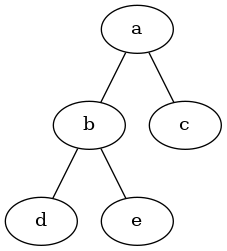

In [11]:
let mut tree : Graph<&str, &str, petgraph::Undirected> = Graph::new_undirected();
let tree_item1 = tree.add_node("a");
let tree_item2 = tree.add_node("b");
let tree_item3 = tree.add_node("c");
let tree_item4 = tree.add_node("d");
let tree_item5 = tree.add_node("e");
tree.add_edge(tree_item1, tree_item2, "");
tree.add_edge(tree_item1, tree_item3, "");
tree.add_edge(tree_item2, tree_item4, "");
tree.add_edge(tree_item2, tree_item5, "");
draw_graph(&tree);

Rings
-----

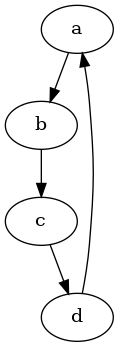

In [12]:
let mut ring : Graph<&str, &str> = Graph::new();
let ring_item1 = ring.add_node("a");
let ring_item2 = ring.add_node("b");
let ring_item3 = ring.add_node("c");
let ring_item4 = ring.add_node("d");
ring.add_edge(ring_item1, ring_item2, "");
ring.add_edge(ring_item2, ring_item3, "");
ring.add_edge(ring_item3, ring_item4, "");
ring.add_edge(ring_item4, ring_item1, "");
draw_graph(&ring);

Dictionaries
------------

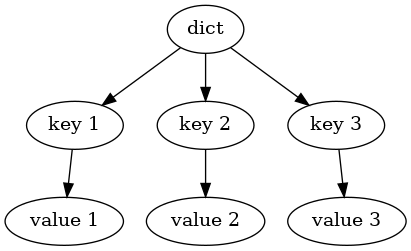

In [13]:
let mut dict : Graph<&str, &str> = Graph::new();
let core = dict.add_node("dict");

let key1 = dict.add_node("key 1");
let key2 = dict.add_node("key 2");
let key3 = dict.add_node("key 3");

let value1 = dict.add_node("value 1");
let value2 = dict.add_node("value 2");
let value3 = dict.add_node("value 3");

dict.add_edge(core, key1, "");
dict.add_edge(core, key2, "");
dict.add_edge(core, key3, "");

dict.add_edge(key1, value1, "");
dict.add_edge(key2, value2, "");
dict.add_edge(key3, value3, "");
draw_graph(&dict);

Basic petgaph usage
-----------------------------

In petgraph there are various ways of storing a graph. The simplest is to use the [`Graph`](https://docs.rs/petgraph/0.4.13/petgraph/graph/struct.Graph.html) data type. `Graph`s can be either Directed or Undirected. (Note: Graphs are stored the same way whether they are Directed or Undirected. All graphs are stored internally as directed graphs. The only difference is the behavior of some algorithms such as the shortest path algorithms. )

You can initialize a directed graph with the statement:

```rust
let mut directed_graph : Graph<&str, &str> = Graph::new();
```

You can initialize an undirected graph with the statement:

```rust
let mut undirected_graph : Graph<&str, &str, petgraph::Undirected> = Graph::new_undirected();
```

You may have noticed that we specify the `Graph`'s type with two type parameters `&str` and `&str`.

The first parameter is the `Node` weight. This is the data that is associated with the node. Weights are sometimes refered to as labels.

The second parameter is the `Edge` weight.

With petgraph you can store any type of data as node or edge weights. Lets create a simple social graph to demonstrate this fact.

In [14]:
use std::fmt;

#[derive(Debug, Copy, Clone)]
struct Person<'a> {
    name: &'a str,
    age: u8,
}

#[derive(Debug, Copy, Clone)]
enum Relationship {
    Friend,
    Father,
    Mother,
    Sister,
    Brother,
    Boss,
}

impl<'a> fmt::Display for Person<'a> {
    fn fmt(&self, f: &mut fmt::Formatter<'_>) -> fmt::Result {
        write!(f, "{}, {}", self.name, self.age)
    }
}

impl fmt::Display for Relationship {
    fn fmt(&self, f: &mut fmt::Formatter<'_>) -> fmt::Result {
        write!(f, "{:?}", self)
    }
}

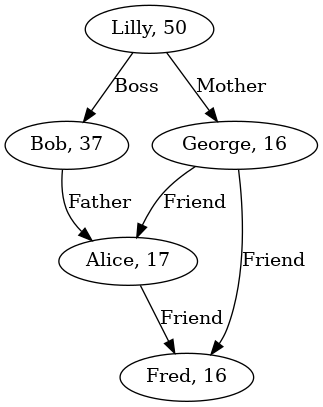

In [15]:
let mut social_graph : Graph<Person, Relationship> = Graph::new();

let bob = social_graph.add_node(Person{name: "Bob", age: 37});
let alice = social_graph.add_node(Person{name: "Alice", age: 17});
social_graph.add_edge(bob, alice, Relationship::Father);

let lilly = social_graph.add_node(Person{name: "Lilly", age: 50});
social_graph.add_edge(lilly, bob, Relationship::Boss);

let george = social_graph.add_node(Person{name: "George", age: 16});
social_graph.add_edge(george, alice, Relationship::Friend);
social_graph.add_edge(lilly, george, Relationship::Mother);

let fred = social_graph.add_node(Person{name: "Fred", age: 16});
social_graph.add_edge(george, fred, Relationship::Friend);
social_graph.add_edge(alice, fred, Relationship::Friend);

draw_graph(&social_graph);

Basic graph operations
---------------------------------

The most basic graph operations can be found directly as methods on the [`Graph`](https://docs.rs/petgraph/0.4.13/petgraph/graph/struct.Graph.html) struct.

One of the most common methods is the [`map`](https://docs.rs/petgraph/0.4.13/petgraph/graph/struct.Graph.html#method.map) method which applies given functions to each node and edge weight in the graph. This method **creates a new graph** and the functions can **change the type of the weights**.

```rust
pub fn map<'a, F, G, N2, E2>(
    &'a self, 
    node_map: F, 
    edge_map: G
) -> Graph<N2, E2, Ty, Ix> where
    F: FnMut(NodeIndex<Ix>, &'a N) -> N2,
    G: FnMut(EdgeIndex<Ix>, &'a E) -> E2, 
```

Here we increment the age of each person in the social graph.

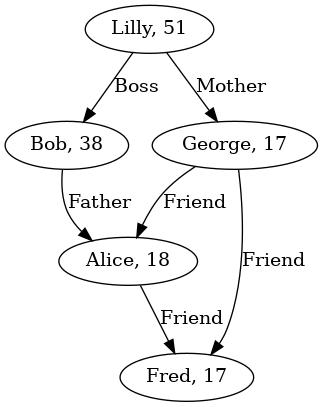

In [16]:
let mut social_graph_a_year_later = social_graph.map(
    |_, p| {
        let mut p = p.clone();
        p.age += 1;
        p
    },
    |_, x| x.clone()
);
draw_graph(&social_graph_a_year_later);

You can also **modify the weights in place** using the [`node_weights_mut`](https://docs.rs/petgraph/0.4.13/petgraph/graph/struct.Graph.html#method.node_weights_mut) and [`edge_weights_mut`](https://docs.rs/petgraph/0.4.13/petgraph/graph/struct.Graph.html#method.edge_weights_mut) iterators. This method **does not allow you to change the types of the weights**.

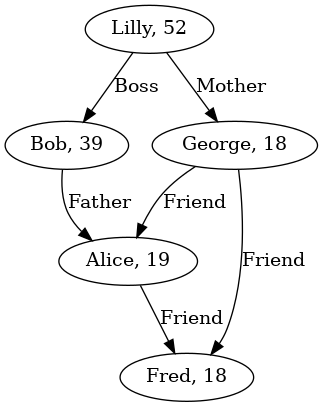

In [17]:
for person in social_graph_a_year_later.node_weights_mut(){
    person.age += 1;
}
draw_graph(&social_graph_a_year_later);

There are a large number of methods provided for `Graph`. Too many to list here. The last thing I'll mention about these methods is that methods wich remove nodes, such as [`filter_map`](https://docs.rs/petgraph/0.4.13/petgraph/graph/struct.Graph.html#method.filter_map) and [`remove_node`](https://docs.rs/petgraph/0.4.13/petgraph/graph/struct.Graph.html#method.remove_node) remove edges which are attached to the removed nodes, rather than leaving them dangling.

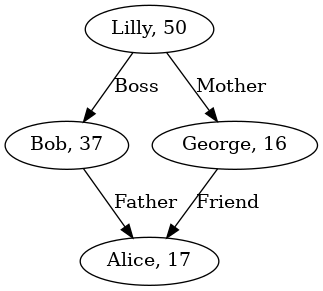

In [18]:
social_graph.remove_node(fred);
draw_graph(&social_graph);

Graph algorithms
--------------------------

Beyond the basic graph operations, petgraph also provides an array of graph algorithms in the module [`algo`](https://docs.rs/petgraph/0.4.13/petgraph/algo/index.html). These operations are well known and you can find their descriptions in most graph textbooks or on wikipedia.

I'll start by describing the functions `is_cyclic_directed` and `is_cyclcic_undirected`. These functions are very important, because the distinction between cyclic graphs and acyclic graphs plays a big role in determining which other algorithms can be applied to the graph.

In [19]:
use petgraph::algo::*;


`Graph`s are stored in a simple adjacency list and the code is self explanitory:

```rust
pub struct Graph<N, E, Ty = Directed, Ix = DefaultIx> {
    nodes: Vec<Node<N, Ix>>,
    edges: Vec<Edge<E, Ix>>,
    ty: PhantomData<Ty>,
}
```

A vertex is refered to as a node and that labels are refered to as weights.

```rust
pub struct Node<N, Ix = DefaultIx> {
    /// Associated node data.
    pub weight: N,
    /// Next edge in outgoing and incoming edge lists.
    next: [EdgeIndex<Ix>; 2],
}
```
...
```rust
pub struct Edge<E, Ix = DefaultIx> {
    /// Associated edge data.
    pub weight: E,
    /// Next edge in outgoing and incoming edge lists.
    next: [EdgeIndex<Ix>; 2],
    /// Start and End node index
    node: [NodeIndex<Ix>; 2],
}
```
...


